NLTK is just a natural language processing tookkit and not a machine learning module. But, SCIKIT LEARN is.
Although NLTK has naive bayes and all but Scikit learn has those too along with other machine learning algorithms.

In [3]:
import nltk
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier #It can wrap sklearn algorithms inside nltk classifiers
nltk.download('movie_reviews')
nltk.download('punkt')
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

#documents = [(list(movie_reviews.words(fileid)), category)
#                  for category in movie_reviews.categories()
#                  for fileid in movie_reviews.fileids(category)]



[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training and testing set

In [4]:
documents = []
for category in movie_reviews.categories():
 for fileid in movie_reviews.fileids(category):
    documents.append((list(movie_reviews.words(fileid)), category))

random.shuffle(documents)

print(documents[1])

(['are', 'you', 'tired', 'of', 'all', 'the', 'hot', 'new', 'releases', 'being', 'gone', 'by', 'the', 'time', 'you', 'get', 'to', 'the', 'video', 'store', '?', 'wafflemovies', '.', 'com', 'is', 'dedicated', 'to', 'finding', 'those', 'hidden', 'gems', 'that', 'lie', 'on', 'the', 'shelves', '.', 'everyweek', ',', 'wafflemovies', '.', 'com', 'reviews', 'independent', 'film', 'and', 'big', 'studio', 'pictures', 'that', 'deserve', 'a', 'second', 'chance', 'on', 'video', '.', 'here', 'is', 'a', 'sample', 'review', ':', 'welcome', 'to', 'sarajevo', 'in', 'light', 'of', 'america', "'", 's', 'recent', 'intervention', 'in', 'kosovo', ',', 'welcome', 'to', 'sarajevo', 'is', 'a', 'reminder', 'of', 'the', 'horror', 'america', 'and', 'the', 'world', 'ignored', 'for', 'years', '.', 'set', 'in', 'sarajevo', '1992', 'and', 'based', 'on', 'actual', 'events', ',', 'this', 'picture', 'examines', 'the', 'human', 'and', 'societal', 'casualties', 'of', 'war', '.', 'the', 'picture', 'opens', 'with', 'a', 'fami

We are going to use this bag of words and compile them. After taking this list of words, Then take most popular words we used and then will classify which are positive words and which ae negative texts based on the words that they contain.

In [5]:
all_words = []
for w in movie_reviews.words():
  all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15)) #Most common 15 words from the bag of words
print(all_words["stupid"]) #Frequency of the word Stupid

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
253


In [6]:
word_features = list(all_words.keys())[:3000] #Most feequent 3000 words
print(word_features)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'see', 'him', 'in', 'her', 'life', 'has', 'nightmares', 'what', "'", 's', 'deal', '?', 'watch', 'movie', '"', 'sorta', 'find', 'out', 'critique', 'mind', '-', 'fuck', 'for', 'generation', 'that', 'touches', 'on', 'very', 'cool', 'idea', 'presents', 'it', 'bad', 'package', 'which', 'is', 'makes', 'this', 'review', 'even', 'harder', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'with', 'your', 'head', 'such', '(', 'lost', 'highway', '&', 'memento', ')', 'there', 'are', 'good', 'ways', 'making', 'all', 'types', 'these', 'folks', 'just', 'didn', 't', 'snag', 'correctly', 'seem', 'have', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'so', 'problems', 'well', 'its', 'main', 'problem', 'simply', 'to

In [7]:
def find_features(document):
  words = set(document)
  features = {}
  for w in word_features:
    features[w] = (w in words) #if the document contains any of the top 3000 words from the word_features list, It will return True. Else, False

  return features

print(find_features(movie_reviews.words('neg/cv000_29416.txt'))) #giving the document to run operation

featuresets = [(find_features(rev),category) for (rev, category) in documents] #Checking if those document words are in those top 3000 popular words or not

{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': True, 'package': True, 'which': True, 'is': True, 'makes': True, 'this': True, 'review': True, 'even': True, 'harder': True, 'wri

In [8]:
#In training sets, We have to see how many of them (words of the list "word_features") appeared in the negative reviews and how many of
# them appeared in the positive reviews
training_set = featuresets[:1900] #Training set 

#In testing sets, We don't tell the machine the category, The machine will have to tell us of which category the words belongs to
testing_set = featuresets[1900:]  #Testing set

Application of the Naive Bayes Algorithm

**Naive Bayes:** Its just Bayes algorithm works on very strong independent assumptions for each feature. 

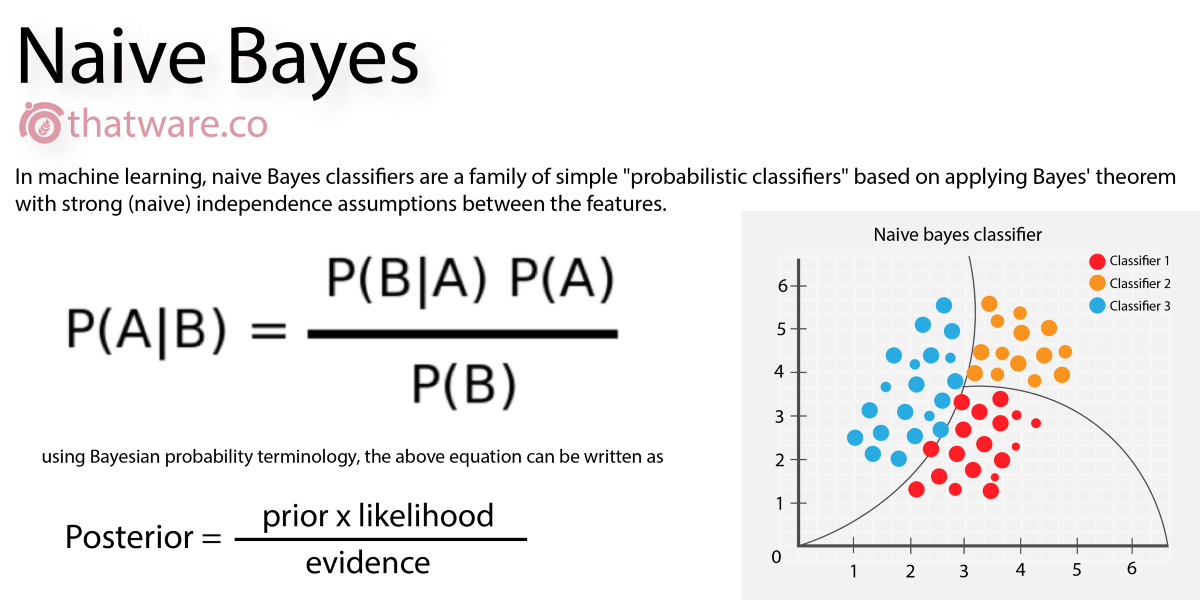

#Original naive bayes accuracy

In [9]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original naive bayes algo accuracy: ",nltk.classify.accuracy(classifier, testing_set))
classifier.show_most_informative_features(15)

Original naive bayes algo accuracy:  0.85
Most Informative Features
               atrocious = True              neg : pos    =     11.4 : 1.0
              schumacher = True              neg : pos    =     11.4 : 1.0
                  justin = True              neg : pos    =      9.5 : 1.0
                   sucks = True              neg : pos    =      9.2 : 1.0
                 frances = True              pos : neg    =      9.2 : 1.0
                  annual = True              pos : neg    =      9.2 : 1.0
                  turkey = True              neg : pos    =      8.6 : 1.0
           unimaginative = True              neg : pos    =      8.2 : 1.0
                  welles = True              neg : pos    =      7.5 : 1.0
             silverstone = True              neg : pos    =      7.5 : 1.0
                 idiotic = True              neg : pos    =      7.3 : 1.0
                  suvari = True              neg : pos    =      6.9 : 1.0
                    mena = True 

#Sklearn incorporation and Training the algorithm

Multinomial Naive bayes

In [10]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB classifier accuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))

MNB classifier accuracy:  0.88


Gaussian Naive bayes

In [ ]:
GNB_classifier = SklearnClassifier(GaussianNB())
GNB_classifier.train(training_set)
print("GNB classifier accuracy: ",nltk.classify.accuracy(GNB_classifier, testing_set))

Bernoulli Naive bayes

In [11]:
BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print("BNB classifier accuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))

BNB classifier accuracy:  0.85


Logistic regression classifier

In [12]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression classifier accuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression classifier accuracy:  0.84


SGD classifier

In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
SGDClassifier = SklearnClassifier(SGDClassifier())
SGDClassifier.train(training_set)
print("SGDClassifier accuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))

SGDClassifier accuracy:  0.83


SVC classifier

In [14]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC classifier accuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))

SVC classifier accuracy:  0.88


LinearSVC classifier

In [15]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC classifier aaccuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))

LinearSVC classifier aaccuracy:  0.8


NuSVC classifier

In [16]:
NuSVC_classifier = SklearnClassifier(NuSVC(nu=0.5))
NuSVC_classifier.train(training_set)
print("NuSVC classifier aaccuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

NuSVC classifier aaccuracy:  0.88


All in one glance

In [17]:
print("Original naive bayes algo accuracy: ",nltk.classify.accuracy(classifier, testing_set))
print("MNB classifier accuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))
print("BNB classifier accuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))
print("LogisticRegression classifier accuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))
print("SGDClassifier accuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))
print("SVC classifier accuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))
print("LinearSVC classifier accuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))
print("NuSVC classifier accuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

Original naive bayes algo accuracy:  0.85
MNB classifier accuracy:  0.88
BNB classifier accuracy:  0.85
LogisticRegression classifier accuracy:  0.84
SGDClassifier accuracy:  0.83
SVC classifier accuracy:  0.88
LinearSVC classifier accuracy:  0.8
NuSVC classifier accuracy:  0.88


#Vote classifier

Now, We will create a classifier that combines the result of all the classifiers and gives an output. 

This not only raises the accuracy, But also the reliability & confidence.

In [32]:
from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
  def __init__(self, *classifers):
    self._classifiers = classifers

  def classify(self,features):
    votes = []
    for i in self._classifiers:
      v = i.classify(features)
      votes.append(v)
    return mode(votes)

  def confidence(self, features):
    votes = []
    for i in self._classifiers:
      v = i.classify(features)
      votes.append(v)
    choice_votes = votes.count(mode(votes))   
    conf = choice_votes/len(votes)
    return conf

voted_classifier = VoteClassifier(MNB_classifier, BNB_classifier, LogisticRegression_classifier, SGDClassifier, SVC_classifier, LinearSVC_classifier, NuSVC_classifier)
print("Voted classifier aaccuracy: ",nltk.classify.accuracy(voted_classifier, testing_set))
print("Classification:", voted_classifier.classify(testing_set[0][0]),"|","Confidence:", voted_classifier.confidence(testing_set[0][0]))
print("Classification:", voted_classifier.classify(testing_set[1][0]),"|","Confidence:", voted_classifier.confidence(testing_set[1][0]))
print("Classification:", voted_classifier.classify(testing_set[2][0]),"|","Confidence:", voted_classifier.confidence(testing_set[2][0]))
print("Classification:", voted_classifier.classify(testing_set[3][0]),"|","Confidence:", voted_classifier.confidence(testing_set[3][0]))
print("Classification:", voted_classifier.classify(testing_set[4][0]),"|","Confidence:", voted_classifier.confidence(testing_set[4][0]))
print("Classification:", voted_classifier.classify(testing_set[5][0]),"|","Confidence:", voted_classifier.confidence(testing_set[5][0]))
print("Classification:", voted_classifier.classify(testing_set[6][0]),"|","Confidence:", voted_classifier.confidence(testing_set[6][0]))
print("Classification:", voted_classifier.classify(testing_set[7][0]),"|","Confidence:", voted_classifier.confidence(testing_set[7][0]))
print("Classification:", voted_classifier.classify(testing_set[8][0]),"|","Confidence:", voted_classifier.confidence(testing_set[8][0]))

AttributeError: ignored

#Investigating Bias

#**Positive data example**

Dataset splitting

Uploading the positive data

In [19]:
from google.colab import files
files.upload()

Saving positive.txt to positive.txt


{'positive.txt': b'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . \r\nthe gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . \r\neffective but too-tepid biopic\r\nif you sometimes like to go to the movies to have fun , wasabi is a good place to start . \r\nemerges as something rare , an issue movie that\'s so honest and keenly observed that it doesn\'t feel like one . \r\nthe film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game . \r\noffers that rare combination of entertainment and education . \r\nperhaps no picture ever made has more literally showed that the road to hell is paved with good intentions . 

In [21]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
short_pos = open("positive.txt","r").read()

documents = []

for r in short_pos.split("\n"):
  documents.append((r,"pos"))

all_words = []

short_pos_words = word_tokenize(short_pos)

for w in short_pos_words:
  all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:5000]

def find_features(document):
  words = word_tokenize(document)
  features = {}
  for w in word_features:
    features[w] = (w in words) #if the document contains any of the top 3000 words from the word_features list, It will return True. Else, False

  return features

featuresets = [(find_features(rev),category) for (rev, category) in documents] #Checking if those document words are in those top 3000 popular words or not
random.shuffle(featuresets)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
training_set = featuresets[:int(len(featuresets)*0.70)] #70% Training set
testing_set = featuresets[:int(len(featuresets)*0.30)]  #30% Testing set

#Original naive bayes accuracy

In [23]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original naive bayes algo accuracy: ",nltk.classify.accuracy(classifier, testing_set))
classifier.show_most_informative_features(15)

Original naive bayes algo accuracy:  1.0
Most Informative Features


Multinomial Naive bayes

In [24]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB classifier accuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))

MNB classifier accuracy:  1.0


Bernoulli Naive bayes

In [25]:
BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print("BNB classifier accuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))

BNB classifier accuracy:  1.0


Logistic regression classifier

In [28]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression classifier accuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))

ValueError: ignored

SGD classifier

In [29]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
SGDClassifier = SklearnClassifier(SGDClassifier())
SGDClassifier.train(training_set)
print("SGDClassifier accuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))

ValueError: ignored

SVC classifier

In [30]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC classifier accuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))

ValueError: ignored

LinearSVC classifier

In [ ]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC classifier aaccuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))

NuSVC classifier

In [ ]:
NuSVC_classifier = SklearnClassifier(NuSVC(nu=0.5))
NuSVC_classifier.train(training_set)
print("NuSVC classifier aaccuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

All in one glance

In [31]:
print("Original naive bayes algo accuracy: ",nltk.classify.accuracy(classifier, testing_set))
print("MNB classifier accuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))
print("BNB classifier accuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))
print("LogisticRegression classifier accuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))
print("SGDClassifier accuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))
print("SVC classifier accuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))
print("LinearSVC classifier accuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))
print("NuSVC classifier accuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

Original naive bayes algo accuracy:  1.0
MNB classifier accuracy:  1.0
BNB classifier accuracy:  1.0


AttributeError: ignored

#**Negative data example**

Uploading dataset

In [30]:
from google.colab import files
files.upload()

Saving negative.txt to negative (1).txt


{'negative.txt': b'simplistic , silly and tedious . \r\nit\'s so laddish and juvenile , only teenage boys could possibly find it funny . \r\nexploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . \r\n[garbus] discards the potential for pathological study , exhuming instead , the skewed melodrama of the circumstantial situation . \r\na visually flashy but narratively opaque and emotionally vapid exercise in style and mystification . \r\nthe story is also as unoriginal as they come , already having been recycled more times than i\'d care to count . \r\nabout the only thing to give the movie points for is bravado -- to take an entirely stale concept and push it through the audience\'s meat grinder one more time . \r\nnot so much farcical as sour . \r\nunfortunately the story and the actors are served with a hack script . \r\nall the more disquieting for its relatively gore-free allusions to the serial murde

In [38]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

short_neg = open("negative.txt","r").read()

documents = []

for r in short_neg.split("\n"):
  documents.append((r,"neg"))

all_words = []

short_neg_words = word_tokenize(short_neg)

for w in short_neg_words:
  all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:5000]

def find_features(document):
  words = set(document)
  features = {}
  for w in word_features:
    features[w] = (w in words) #if the document contains any of the top 3000 words from the word_features list, It will return True. Else, False

  return features

featuresets = [(find_features(rev),category) for (rev, category) in documents] #Checking if those document words are in those top 3000 popular words or not

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset splitting

In [39]:
training_set = featuresets[100:] #Training set 
testing_set = featuresets[:100]  #Testing set

#Original naive bayes accuracy

In [40]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original naive bayes algo accuracy: ",nltk.classify.accuracy(classifier, testing_set))
classifier.show_most_informative_features(15)

Original naive bayes algo accuracy:  1.0
Most Informative Features


Multinomial Naive bayes

In [ ]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB classifier accuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))

MNB classifier accuracy:  0.78


Bernoulli Naive bayes

In [ ]:
BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print("BNB classifier accuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))

BNB classifier accuracy:  0.77


Logistic regression classifier

In [ ]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression classifier accuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression classifier accuracy:  0.84


SGD classifier

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
SGDClassifier = SklearnClassifier(SGDClassifier())
SGDClassifier.train(training_set)
print("SGDClassifier accuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))

SGDClassifier accuracy:  0.81


SVC classifier

In [ ]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC classifier accuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))

SVC classifier accuracy:  0.86


LinearSVC classifier

In [ ]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC classifier aaccuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))

LinearSVC classifier aaccuracy:  0.8


NuSVC classifier

In [ ]:
NuSVC_classifier = SklearnClassifier(NuSVC(nu=0.5))
NuSVC_classifier.train(training_set)
print("NuSVC classifier aaccuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

NuSVC classifier aaccuracy:  0.87


All in one glance

In [ ]:
print("Original naive bayes algo accuracy: ",nltk.classify.accuracy(classifier, testing_set))
print("MNB classifier accuracy: ",nltk.classify.accuracy(MNB_classifier, testing_set))
print("BNB classifier accuracy: ",nltk.classify.accuracy(BNB_classifier, testing_set))
print("LogisticRegression classifier accuracy: ",nltk.classify.accuracy(LogisticRegression_classifier, testing_set))
print("SGDClassifier accuracy: ",nltk.classify.accuracy(SGDClassifier, testing_set))
print("SVC classifier accuracy: ",nltk.classify.accuracy(SVC_classifier, testing_set))
print("LinearSVC classifier accuracy: ",nltk.classify.accuracy(LinearSVC_classifier, testing_set))
print("NuSVC classifier accuracy: ",nltk.classify.accuracy(NuSVC_classifier, testing_set))

Original naive bayes algo accuracy:  0.78
MNB classifier accuracy:  0.78
BNB classifier accuracy:  0.77
LogisticRegression classifier accuracy:  0.84
SGDClassifier accuracy:  0.81
SVC classifier accuracy:  0.86
LinearSVC classifier accuracy:  0.8
NuSVC classifier accuracy:  0.87
